<a href="https://colab.research.google.com/github/letpires/imdb_sentiment_analysis/blob/main/analise_sentimento_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

review = pd.read_csv("/content/imdb-reviews-pt-br.csv")
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [13]:
from sklearn.model_selection import train_test_split
#retorna uma lista com os dados segregados
#quero segregar (classificar textos)
#coluna que deve seguir a proporção (Sentimento) e vai gerar as classes de treino

train, test, train_class, test_class = train_test_split(review.text_pt,
                                                              review.sentiment,
                                                              random_state=42)

In [14]:
train

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [15]:
test

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
                               ...                        
16421    Crescendo como filho do cinema, uma das trilog...
39861    Este filme é o melhor filme de todos os tempos...
309      "Electra Glide in Blue" é um movimento lento e...
20638    Eu amo esse filme ! Eu acho que já vi 5 vezes ...
38935    Eu vi alguns filmes sobre transtornos alimenta...
Name: text_pt, Length: 12365, dtype: object

In [16]:
#labels
test_class

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [17]:
from sklearn.linear_model import LogisticRegression

#Criando a variável 
logistic_regression = LogisticRegression()

#Treinando o modelo com o .fit
logistic_regression.fit(train, train_class)
accuracy = logistic_regression.score(test, test_class)

ValueError: ignored

In [18]:
print("Negativa \n")
print(review.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [19]:
print("Positiva \n")
print(review.text_pt[49000])

Positiva 

Quinze anos depois e Paris Is Burning ainda está em chamas. Este é um clássico dos filmes gays negros, junto com os outros filmes homossexuais negros honorários, The Color Purple e Mahoganoy. Este trabalho seminal captura underground e underclass ou seja, "underserved cultura gay negra e latina e comunidade como nenhum outro trabalho antes ou depois, incluindo todas as retrospectivas e renderings homossexuais sentimentais do Harlem Renascimento. Eles são bons, mas este é o melhor desafio eu digo o único" Um filme real que você vai encontrar sobre o assunto. Sua implacável Cunty, a clássica música house, se torna aclamada por Hollywood, um acampamento hilariante e inimaginável, como só nós fazemos e crítica social. Tudo isso por uma diretora branca que obviamente deve ter sido uma irmã Gurl ou Mizz Thing em uma vida anterior Eu poderia continuar, mas acho que você entendeu o ponto: amo este filme!


In [20]:
print(review.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [21]:
#Trocando na coluna sentiment o que for neg = 0, pos=1
classification = review["sentiment"].replace(["neg", "pos"], [0,1])
classification

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [22]:
review["classification"] = classification

In [23]:
review.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

#Criando o nosso CORPUS
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

#Criar os vetores de representação
#Lowercase = False para o dicionário retornar exatamente como coloquei com letras maiúsculas
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [28]:
#Esse método vai retornar o meu dicionário.
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [29]:
#A saída é uma matriz esparsa 2x5
#Matriz esparsa é uma matriz grande, onde a maioria dos valores são zeros
#Não vale a pena armazenar essa matriz toda com zeros
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [37]:
import pandas
matriz_esparsa = pandas.DataFrame.sparse.from_spmatrix (bag_of_words,
                      columns = vetorizar.get_feature_names())

In [38]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


Cada frase e resenha do corpus textual, dataset, foi representado por um vetor de 156923 dimensões, ou seja, é um vetor muito grande, enorme, que custa armazenamento de memória, tempo de processamento, então é caro, computacionalmente falando, manter um vetor de tantas dimensões. Uma forma de melhorarmos isso dentro da função CountVectorizer é utilizar o parâmetro max_features.

Este parâmetro vai criar o vetor do tamanho que desejarmos, porém, as palavras que estarão neste vetor são aquelas que mais aparecem no corpus textual. O valor pode ser 10, 20, 100 mil, qualquer um que se deseje; no caso, queremos 50, um valor aparentemente interessante de trabalharmos com o tamanho de dados que temos.

In [40]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(review.text_pt)
#Verificar tamanho do vetor
print(bag_of_words.shape)

(49459, 50)


In [45]:
train, test, train_class, test_class = train_test_split(bag_of_words,
                                                        review.classification,
                                                        random_state=42)

def classificar_texto(texto,coluna_texto, coluna_classificacao):

  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  train, test, train_class, test_class = train_test_split(bag_of_words,
                                                        review.classification,
                                                        random_state=42)
  
  #Criando a variável 
  logistic_regression = LogisticRegression()

  #Treinando o modelo com o .fit
  logistic_regression.fit(train, train_class)
  return logistic_regression.score(test, test_class)

print(classificar_texto(review, "text_pt", "classification"))

0.6583097452486858


In [46]:
pip install wordcloud

List Comprehsion

In [48]:
%matplotlib inline

from wordcloud import WordCloud

#Utilizar o list comprehsion para juntar todas as palavras
#o join junta todos os trechos que estavam separados

all_words = ' '.join([texto for texto in review.text_pt])

In [49]:
len(all_words)

63448424

Lá na frente, no curso de PLN 2 veremos algo denominado enneagrams, que são, adiantando um pouco, quando olhamos um bigrama, duas palavras juntas. Em vez de analisarmos as palavras separadamente, analisamos em pares. Então, em vez de "um" e "filme", analisamos "um filme".

Neste momento, não é o que queremos, pois queremos saber das palavras mais frequentes quando a frase é classificada como positiva ou negativa. Então, precisamos, de algum modo, retirar estes bigramas. Para isso passaremos um parâmetro chamado collocations com valor falso para o WordCloud.

Na documentação do site, temos a explicação do collocations, então se passamos como True, que é o default, o cálculo das frequências será feito pelo bigrama, e agora só queremos o cálculo da frequência das palavras, e não o bigrama. Já setamos o collocations como False, vamos também tirar as numerações dos eixos com plt.axis("off").

In [54]:
#Resulta em um objeto, pra transformar em imagem tem que usar o matplotlib
word_cloud = WordCloud(width=800, height=500, 
                       max_font_size = 110,
                       collocations=False).generate(all_words)
word_cloud

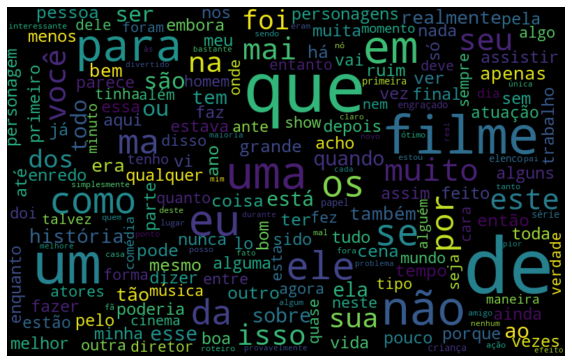

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [56]:
review.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classification
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [58]:
def create_wordcloud_neg(texto, coluna_texto):

  texto_negativo = texto.query("sentiment == 'neg'")

  all_words = ' '.join([texto for texto in texto_negativo[coluna_texto]])
  word_cloud = WordCloud(width=800, height=500, 
                        max_font_size = 110,
                        collocations=False).generate(all_words)

  plt.figure(figsize=(10,7))
  plt.imshow(word_cloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

In [59]:
def create_wordcloud_pos(texto, coluna_texto):

  texto_positivo = texto.query("sentiment == 'pos'")

  all_words = ' '.join([texto for texto in texto_positivo[coluna_texto]])
  word_cloud = WordCloud(width=800, height=500, 
                        max_font_size = 110,
                        collocations=False).generate(all_words)

  plt.figure(figsize=(10,7))
  plt.imshow(word_cloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

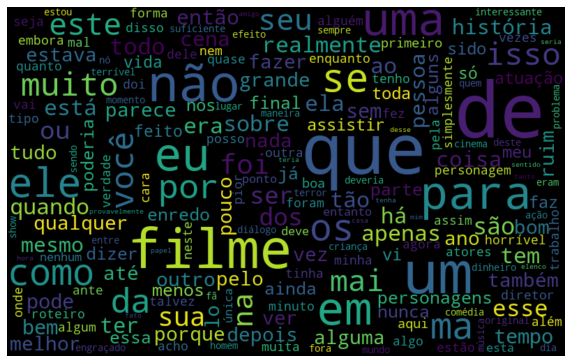

In [60]:
create_wordcloud_neg(review, "text_pt")

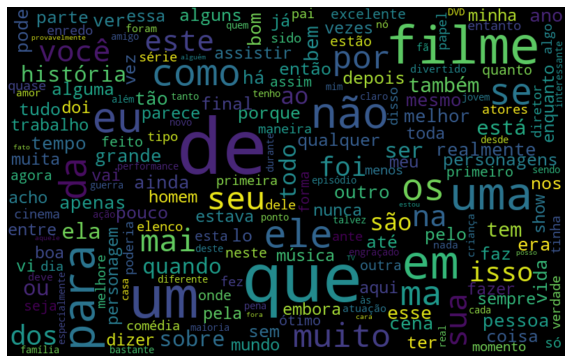

In [61]:
create_wordcloud_pos(review, "text_pt")

In [62]:
pip install nltk

In [63]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

Para calcular a frequencia das palavras com NLTK é necessário separar as palavras, tokeinizar.

In [67]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(all_words)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), 
                              "Frequência": list(frequencia.values())})

In [74]:
#Mostra as 10 palavras com mais frequência
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n=10)

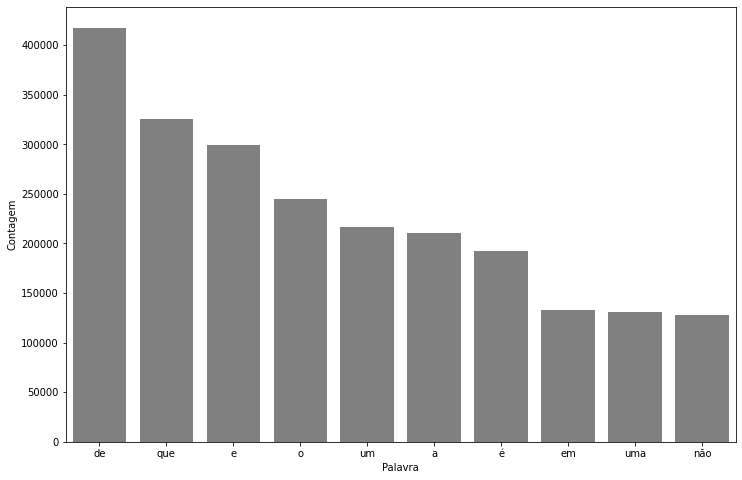

In [76]:
import seaborn as sns


def pareto(texto, coluna_texto, quantidade):
  all_words = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(all_words)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), 
                              "Frequência": list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns = "Frequência", n=quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencia, x = "Palavra", y = "Frequência", 
                 color = 'gray')
  ax.set(ylabel = "Contagem")
  plt.show()


pareto(review, 'text_pt', 10)


In [77]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [78]:
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [80]:
frase_processada = list()
for opiniao in review.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))


review["tratamento1"] = frase_processada

In [81]:
review.head()

,id,text_en,text_pt,sentiment,classification,tratamento1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [82]:
classificar_texto(review, "tratamento1", "classificacao")

0.6607359482410028

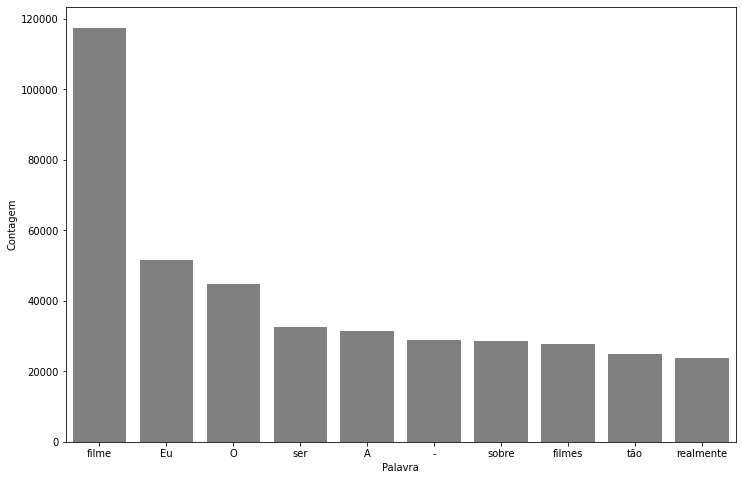

In [83]:
pareto(review, "tratamento1", 10)